<a href="https://colab.research.google.com/github/farisazizy/data-visualization-assignment/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Farishadi Mufakkir Azizy | 1301194003

import library

In [28]:
import tweepy # crawl data twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Crawling Data dari Twitter

In [2]:
consumer_key = "OrIwga1FffNKpWq66tB9C1iR4" 
consumer_secret = "gbTBdzWvV3JwYPBsCOHacDdmdgW89Pl0B0KK5bvJ7MqQkKzMBI"
access_token = "1368881364-2PUMbw8c0EfdFqLuylsIoVs89uiNg4oW52nO94U"
access_token_secret = "rZzUtSAfraKFlh5jBnak5ut4kmdA7ju9bbqMCZW3rNl4j"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
# Fungsi untuk menyimpan hasil crawl data twitter ke bentuk csv
def keyword_to_csv(keyword, recent):
    try:
        tweets = tweepy.Cursor(api.search,q=keyword).items(recent) # buat query
        tweets_list = [[tweet.text] for tweet in tweets] # pull tweet
        df = pd.DataFrame(tweets_list,columns=['Text']) # membuat dataframe
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False) # export menjadi csv
    except BaseException as e:
        print('failed on_status,', str(e))
        time.sleep(3)

Data yang digunakan adalah tweet pada feeds trending. Terdapat tiga hastags populer pada trending feeds twitter yaitu sebagai berikut:

*   Selamat hari guru 25 november 2021
*   UU Cipta Kerja 25 November 2021
*   Omicron: 29 November 2021









In [ ]:
keyword = 'selamathariguru'+ " -filter:retweets" #excludes retweets
recent  = 3000
keyword_to_csv(keyword, recent)

In [ ]:
keyword1 = 'UU Cipta Kerja'+ " -filter:retweets" #excludes retweets
recent1  = 1500
keyword_to_csv(keyword1, recent)

In [24]:
keyword2 = 'Omicron'+ " -filter:retweets" #excludes retweets
recent1  = 1000
keyword_to_csv(keyword2, recent1)

## Data Cleaning

In [25]:
df = pd.read_csv("hariguru.csv")
df1 = pd.read_csv("UU.csv")
df2 = pd.read_csv("Omicron -filter:retweets.csv")
pd.options.display.max_colwidth = 200 

print(df.head())
print(df1.head())
print(df2.head())

                                                                                                                                               Text
0  Kalaupun ada satu mata air lain\nsetelah orang tuaku\nitu pasti mutlak guruku—\nsebab ia adalah figur yang tak letih\nm… https://t.co/oLNPpsUonY
1    #SelamatHariGuru, \n\nMasih, persoalan yg sama. Masih banyak guru yg belum sejahtera...\nAyo pak @jokowi sejahterakan… https://t.co/5pEBnQlnIw
2                                                                                                                                  #selamathariguru
3     Selamat hari guru nasional\n#hariguru\n#selamathariguru\n#harigurunasional2021 \n#wagubjatim\n#infojatim\n#emildardak https://t.co/i4SCbgVgnY
4      Tidak ada manusia kerbau atau manusia dewa, semua saling belajar dan diajari. Semua manusia adalah guru dan semua g… https://t.co/vM7iCEvPUk
                                                                                                                

In [14]:
# Fungsi untuk data cleaning, menghapus simbol yang tidak perlu
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('\n', ' ', text) # Removing \n
    text = re.sub('_', '', text) # Removing _
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [26]:
# Apply fungsi data cleaning

df['Text'] = df['Text'].apply(cleanTxt)
df1['Text'] = df1['Text'].apply(cleanTxt)
df2['Text'] = df2['Text'].apply(cleanTxt)

## Generate Word Cloud

In [18]:
# Generate stopwords
# Digunakan untuk menghapus kata yang sering muncul namun tidak begitu bermakna seperti kata sambung atau kata yang tidak diperlukan

stopwords = set(STOPWORDS)
stopwords.update(["ke","juga","untuk", "itu","akan","dengan", "yg", "dalam","ini","di","dan","yang","selamat","hari","selamathariguru","adalah"])

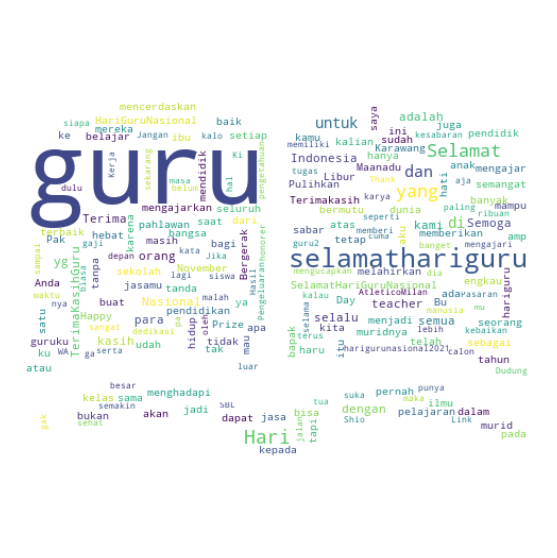

In [48]:
# Membuat Graph word Cloud

allWords = ' '.join([twts for twts in df['Text']])

# Digunakan Book.png untuk membuat pola berbentuk buku
book_mask = np.array(Image.open("book.png"))

wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      max_font_size=200,
                      mask=book_mask,
                      collocations=False, 
                      background_color='white').generate(allWords)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

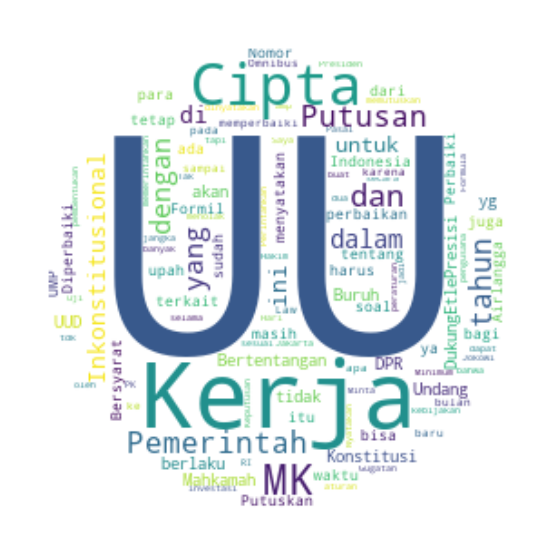

In [49]:
allWords1 = ' '.join([twts for twts in df1['Text']])

# Membuat pola lingkaran
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      max_font_size=200,
                      collocations=False,
                      mask=mask, 
                      background_color='white').generate(allWords1)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

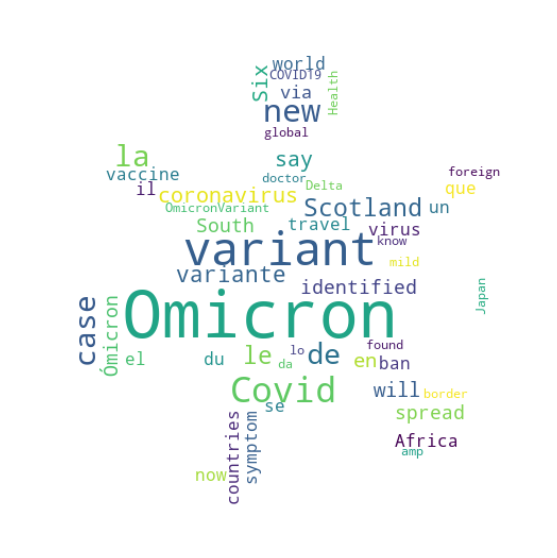

In [50]:
allWords3 = ' '.join([twts for twts in df2['Text']])

# Digunakan Book.png untuk membuat pola berbentuk buku
virus_mask = np.array(Image.open("virus.png"))

wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      mask=virus_mask,
                      max_font_size=200,
                      max_words=50,
                      collocations=False, 
                      background_color='white').generate(allWords3)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()